In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
link = 'http://bit.ly/w-data'
df = pd.read_csv(link)

In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.shape

(25, 2)

# Model building

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df_train,df_test = train_test_split(df,train_size = 0.7,random_state = 100)

In [9]:
df_train.shape,df_test.shape

((17, 2), (8, 2))

In [10]:
df_train.head()

,Hours,Scores
6,9.2,88
12,4.5,41
4,3.5,30
24,7.8,86
0,2.5,21


In [11]:
y_train = df_train.pop('Scores')
x_train = df_train

In [12]:
y_train.head()

6     88
12    41
4     30
24    86
0     21
Name: Scores, dtype: int64

In [13]:
x_train.head()

,Hours
6,9.2
12,4.5
4,3.5
24,7.8
0,2.5


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()

In [16]:
lm = lm.fit(x_train,y_train)

### Model Building using Statsmodel

In [17]:
import statsmodels.api as sm

In [18]:
x_train1 = sm.add_constant(x_train)

In [19]:
lm_stats = sm.OLS(y_train,x_train1).fit()

In [20]:
lm_stats.summary()

C:\Users\Nigama\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           1.15e-11
Time:                        10:42:25   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.644      -5.260       8.250
Hours          9.8717      0.540     18.288      0.000       8.721      11.022
==============================================================================
Omnibus:                        4.576   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                1.488
Skew:                          -0.198   Prob(JB):                        0.475
Kurtosis:                       1.606   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residual analysis of train data 

In [21]:
y_train_score = lm.predict(x_train)

C:\Users\Nigama\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

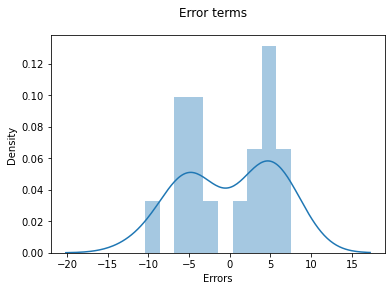

In [22]:
fig = plt.figure()
sns.distplot(y_train - y_train_score, bins = 10)
fig.suptitle('Error terms')
plt.xlabel('Errors')

In [23]:
y_train_score_stats = lm_stats.predict(x_train1)

C:\Users\Nigama\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

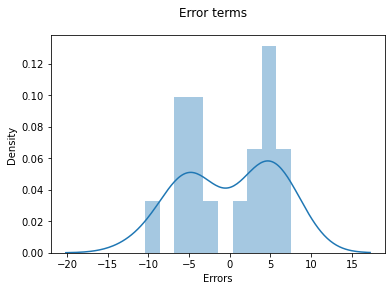

In [24]:
fig = plt.figure()
sns.distplot(y_train - y_train_score_stats, bins = 10)
fig.suptitle('Error terms')
plt.xlabel('Errors')

### Making predictions

In [25]:
y_test = df_test.pop('Scores')
x_test = df_test

In [26]:
y_test_pred = lm.predict(x_test)

In [27]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})  
df 

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


In [28]:
#Predicted score if  student studies 9.5Hrs/day

In [29]:
giv_hour = pd.DataFrame({'Hour': [9.5]})

In [30]:
own_pred = lm.predict(giv_hour)

C:\Users\Nigama\anaconda3\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Hour
Feature names seen at fit time, yet now missing:
- Hours

  warnings.warn(message, FutureWarning)


In [31]:
print("Predicted score if  student studies 9.5Hrs/day = {}".format(own_pred[0]))

Predicted score if  student studies 9.5Hrs/day = 95.27642918067825


### Model evaluation

In [32]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_test_pred)) 

Mean Absolute Error: 4.762517892332275
